# Лабораторная работа 2
Визуализация данных

Выполнил: Клионкин Владислав 6132

0 Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [67]:
import numpy as np
import pandas as pd
from dateutil import parser
from datetime import datetime

kickstarter_df = pd.read_csv("C:\\Users\\Vladislav\\Desktop\\DataAnalisysTools\\ks.csv")
kickstarter_df = kickstarter_df.drop(kickstarter_df[kickstarter_df.usd_goal_real > 20000].index)
kickstarter_df['deadline'] = pd.to_datetime(kickstarter_df['deadline'])
kickstarter_df['launched'] = pd.to_datetime(kickstarter_df['launched'])
kickstarter_df['days_total'] = kickstarter_df.apply(lambda row: (row['deadline'] - row['launched']).days, axis = 1)
kickstarter_df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days_total
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,1205.0,1000.00,19
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.0,failed,0,CA,0.0,0.0,2406.39,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20,5500.0,2014-08-06 03:46:07,0.0,canceled,0,CA,0.0,0.0,4949.60,44
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,26
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,45
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,30


In [27]:
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303345 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                303345 non-null  int64  
 1   name              303343 non-null  object 
 2   category          303345 non-null  object 
 3   main_category     303345 non-null  object 
 4   currency          303345 non-null  object 
 5   deadline          303345 non-null  object 
 6   goal              303345 non-null  float64
 7   launched          303345 non-null  object 
 8   pledged           303345 non-null  float64
 9   state             303345 non-null  object 
 10  backers           303345 non-null  int64  
 11  country           303345 non-null  object 
 12  usd pledged       299567 non-null  float64
 13  usd_pledged_real  303345 non-null  float64
 14  usd_goal_real     303345 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 37.0+ MB


__Описание датасета__: Набор данных представляет оценку успешности проектов на Kickstarter в зависимости от различных характеристик.

__Признаки:__

|      Название      |      Тип       |                             Описание                             |
|:------------------:|:--------------:|:----------------------------------------------------------------:|
| ID | Категориальный | Уникальный идентификатор проекта |
| name | Категориальный | Название проекта |
| category | Категориальный | Точная категория проекта |
| main_category | Категориальный | Общая категория проекта |
| currency | Категориальный | Валюта, в которой велся сбор денег |
| deadline | Числовой | Дата-крайний срок готовности проекта |
| goal | Числовой | Сумма, необходимая для выполнения проекта |
| launched | Числовой | Дата запуска проекта |
| pledged | Числовой | Собранная сумма |
| state | Категориальный | Состояние проекта |
| backers | Числовой | Количество людей, поддержавших проект |
| country | Категориальный | Страна происхождения проекта |
| usd pledged | Числовой | Собранная сумма в долларах США |
| usd_pledged_real | Числовой | Собранная сумма в долларах США (получена с помощью Fixer.io API) |
| usd_goal_real | Числовой | Сумма, необходимая для выполнения проекта (получена с помощью Fixer.io API)|
|days_total| Числовой | Количество дней, прошедших с запуска проекта до завершения |

Каждый график необходимо снабдить комментарием

1 Matplotlib

1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом.
Хотя бы в одном графике подпишите оси.
Во всех графиках подписать название графика.


In [28]:
import matplotlib.pyplot as plt

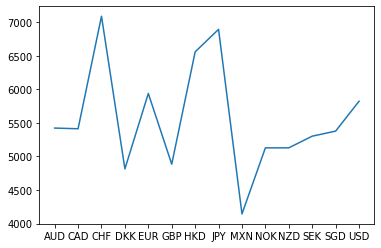

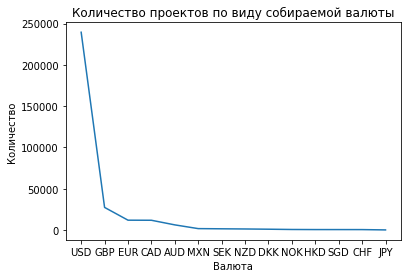

In [29]:
plt.plot(kickstarter_df["currency"].value_counts())
plt.title('Количество проектов по виду собираемой валюты')
plt.xlabel('Валюта')
plt.ylabel('Количество')
plt.show()

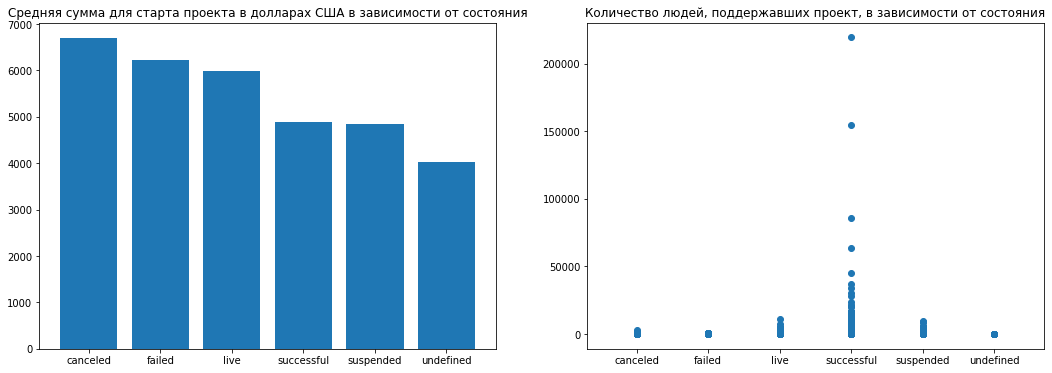

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

goal_currency_plt = axes[0]
mean_by_currency = kickstarter_df[["state", "usd_goal_real"]].groupby(["state"]).mean()
goal_currency_plt.bar(mean_by_currency.index.to_list(), mean_by_currency["usd_goal_real"].to_list())
goal_currency_plt.set(title = 'Средняя сумма для старта проекта в долларах США в зависимости от состояния')

backers_state_plt = axes[1]
backers_state_plt.scatter("state", "backers", data=kickstarter_df)
backers_state_plt.set(title = 'Количество людей, поддержавших проект, в зависимости от состояния')

plt.show()

2  На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

<AxesSubplot:>

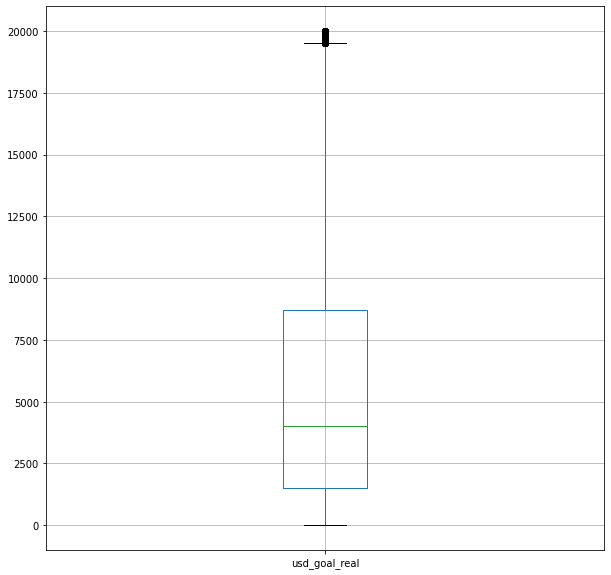

In [51]:
kickstarter_df.boxplot(column=["usd_goal_real"], figsize=(10,10))

<AxesSubplot:title={'center':'Средняя собранная сумма для проекта в долларах США в зависимости от состояния'}, xlabel='state'>

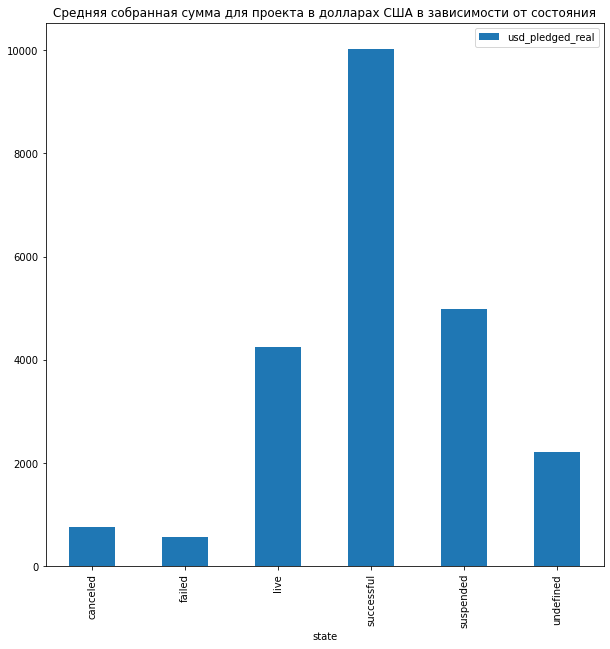

In [52]:
kickstarter_df[["state", "usd_pledged_real"]].groupby(["state"]).mean().plot.bar(figsize=(10,10), title='Средняя собранная сумма для проекта в долларах США в зависимости от состояния')

array([<AxesSubplot:ylabel='count'>], dtype=object)

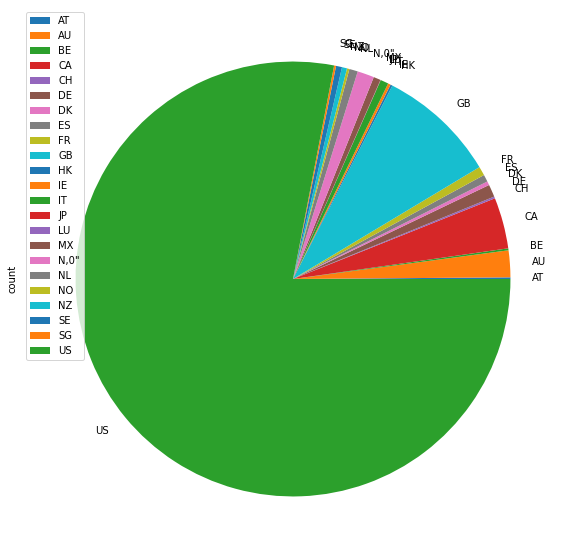

In [68]:
kickstarter_df[["country", "state"]].groupby("country").count().rename(columns={"state": "count"}).plot.pie(subplots=True, figsize=(10,10))

3  Seaborn

3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)


In [78]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12.7,9.27)}) # задаем настройки размера изображений

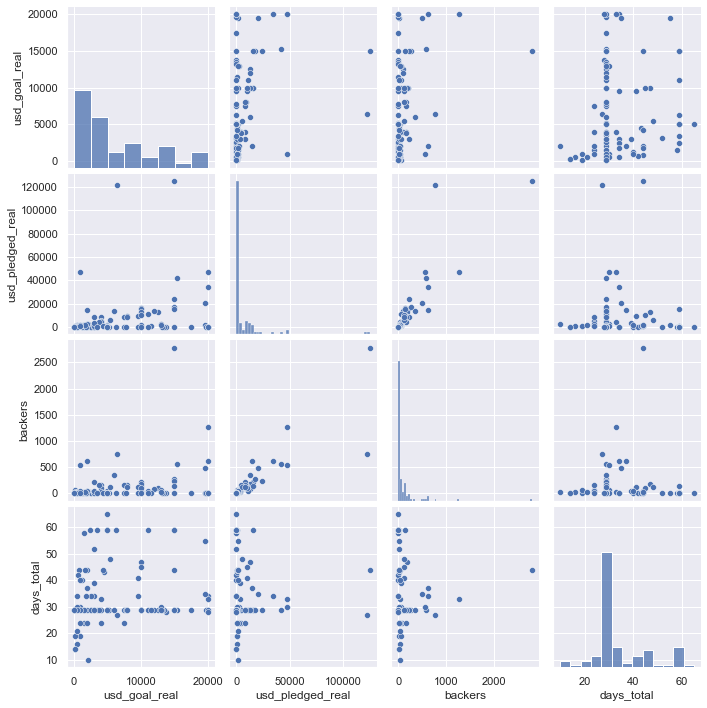

In [91]:
sns.pairplot(kickstarter_df.head(100)[["usd_goal_real", "usd_pledged_real", "backers", "days_total"]])

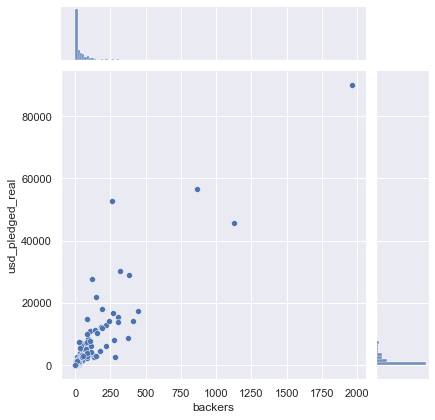

In [83]:
#Зависимость собранной суммы от кол-ва поддержавших
sns.jointplot(data=kickstarter_df.sample(n=250), x="backers", y="usd_pledged_real")

<AxesSubplot:xlabel='state', ylabel='days_total'>

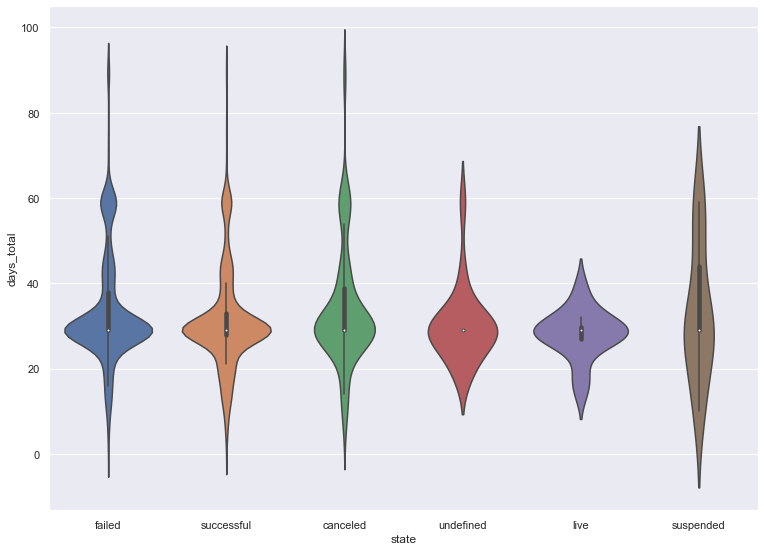

In [92]:
#Распределение срока выполнения проекта в зависимости от сост. проекта
sns.violinplot(data=kickstarter_df.sample(n=2500), x="state", y="days_total")

<AxesSubplot:>

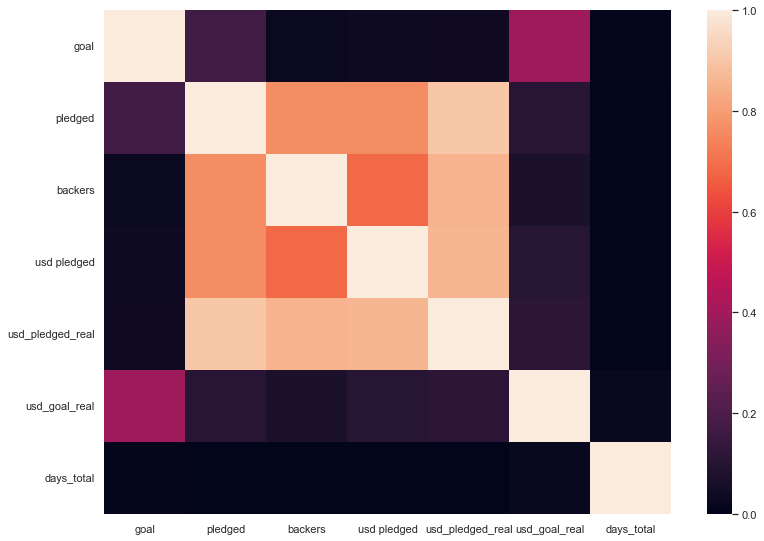

In [101]:
sns.heatmap(kickstarter_df.select_dtypes(include=[np.number]).drop("ID", axis=1).corr())

4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

In [88]:
from scipy.stats import probplot

<AxesSubplot:>

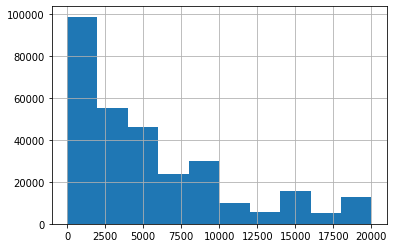

In [72]:
kickstarter_df["usd_goal_real"].hist()

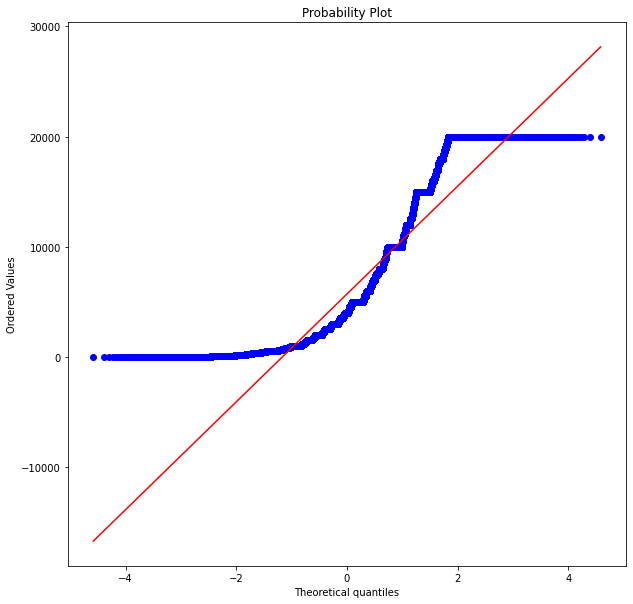

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))
probplot(kickstarter_df["usd_goal_real"], plot=ax)
plt.show()

5 Построить любой график (связанный с вашими данными) с помощью plotly

In [75]:
import plotly.express as px

In [81]:
#Диаграмму рассеяния с помощью plotly
px.histogram(kickstarter_df.head(100), x="days_total", y="usd_goal_real")